# Balancing Data

Resampling is the most straightforward method for dealing with highly imbalanced datasets . It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

To skip to [Balancing Data](#encode).

## Table of Content

1. **[Header Files](#lib)**
2. **[About Data Set](#about)**
3. **[Data Preparation](#prep)**
    - 3.1 - **[Read Data](#read)**
    - 3.2 - **[Analysing Missing Values](#miss)**
4. **[Balancing Data](#balance)**
    - 4.1 - **[Over Sampling](#over)**
        - 4.1.1 - **[Balancing for binary class](#binary)**
        - 4.1.2 - **[Balancing for multi class data](#multi)**
    - 4.2 - **[Under Sampling](#under)**
    
    

<a id="lib"></a>
## 1. Import Libraries

In [49]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


<a id="about"></a>
## 2. About the Dataset

<a id="prep"></a>
## 3. Data Preperation

<a id="read"></a>
## 3.1 Read Data

In [50]:
df=pd.read_csv('bank.csv')
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


In [51]:
data=pd.read_csv('accident severity.csv')
data.drop(['dvcat','caseid'],axis=1,inplace=True)
data.head()

,weight,dead,airbag,seatbelt,frontal,sex,ageofocc,yearacc,yearveh,abcat,occrole,deploy,injseverity
0,53.342,dead,airbag,belted,1,f,48,2002,1997,deploy,driver,1,3
1,154.960,alive,none,none,1,m,26,2001,1968,unavail,driver,0,3
2,38.994,alive,none,none,1,f,51,2002,1994,unavail,driver,0,3
3,168.568,alive,airbag,belted,1,m,27,1998,1996,deploy,pass,1,3
4,27.751,alive,airbag,belted,0,m,26,2002,1997,nodeploy,pass,0,0


<a id="miss"></a>
## 3.2 Analysing Missing Values

In [52]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [53]:
data.isnull().sum()

weight         0
dead           0
airbag         0
seatbelt       0
frontal        0
sex            0
ageofocc       0
yearacc        0
yearveh        0
abcat          0
occrole        0
deploy         0
injseverity    0
dtype: int64

<a id="enc"></a>
## 3.3 Encoding

In [54]:
# Spliting numerical and categorical data because feature scaling is performed only on numerical data
df=pd.get_dummies(df,drop_first=True)
df=df.rename(columns={'y_yes':'y'})
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,0
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,1
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,0
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,1
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,1


In [55]:
# Spliting numerical and categorical data because feature scaling is performed only on numerical data
data=pd.get_dummies(data,drop_first=True)
data.head()

,weight,frontal,ageofocc,yearacc,yearveh,deploy,injseverity,dead_dead,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occrole_pass
0,53.342,1,48,2002,1997,1,3,1,0,0,0,0,0,0
1,154.960,1,26,2001,1968,0,3,0,1,1,1,0,1,0
2,38.994,1,51,2002,1994,0,3,0,1,1,0,0,1,0
3,168.568,1,27,1998,1996,1,3,0,0,0,1,0,0,1
4,27.751,0,26,2002,1997,0,0,0,0,0,1,1,0,1


<a id="balance"></a>
# 4. Balancing Data

<a id="over"></a>
### 4.1 Over Sampling

In [56]:
X=df.drop('y',axis=1)
Y=df.y

<a id="binary"></a>
### 4.1.1 Balancing for binary class

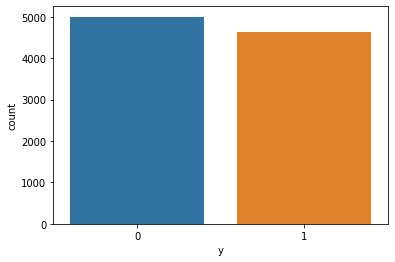

In [57]:
sns.countplot(x=Y)
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE 

In [59]:
smote = SMOTE(random_state=42)
X_sm, Y_sm = smote.fit_resample(X, Y)
Y_sm.value_counts()

0    5000
1    5000
Name: y, dtype: int64

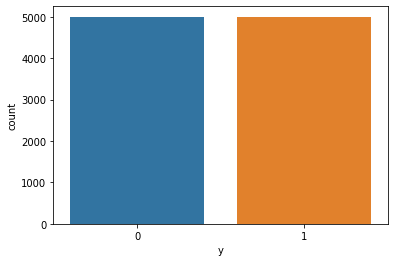

In [60]:
sns.countplot(x=Y_sm)
plt.show()

<a id="multi"></a>
### 4.1.2 Balancing for multi class data

In [61]:
X=data.drop('injseverity',axis=1)
Y=data.injseverity

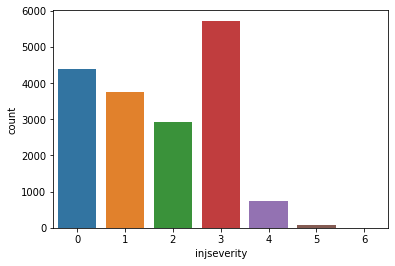

In [62]:
sns.countplot(x=Y)
plt.show()

In [63]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(random_state=10)
x,y=ros.fit_resample(X,Y)

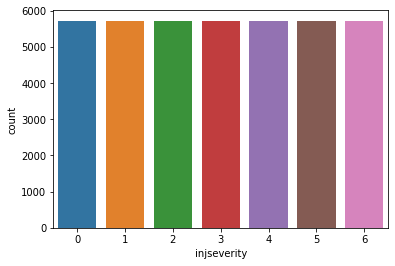

In [64]:
sns.countplot(x=y)
plt.show()

<a id="under"></a>
### 4.3 Under Sampling

Randomly delete examples in the majority class. The main problem with undersampling is that if the class with smallest records has too few records a majority of the data will be lost. Over sampling is practised in most cases to prevent data loss.

In [66]:
from imblearn.under_sampling import RandomUnderSampler

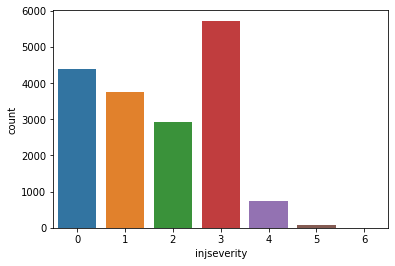

In [67]:
sns.countplot(x=Y)
plt.show()

In [68]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomUnderSampler(random_state=10)
x,y=ros.fit_resample(X,Y)

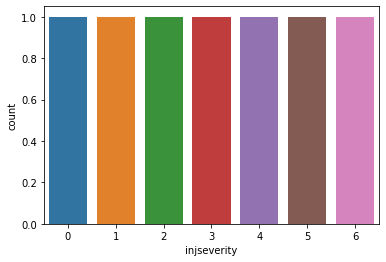

In [69]:
sns.countplot(x=y)
plt.show()

Because the smallest class has the lowest number of samples, samples of all the classes are brought down but a very high percentage of the data is lost in the process. 